# HW2
Name: Dhanabordee Mekintharanggur
ID: 6238077121

In [107]:
%matplotlib inline
import numpy as np # n-dimensional array object & math functions
import pandas as pd # load data into dataframe
import sklearn #scikit-learn algorithms for machine learning
import scipy # scientific computing: linear algebra, optimization, signal processing, statistics
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # advanced statistical plots
from matplotlib import rcParams

ImportError: cannot import name 'processing' from 'sklearn' (/Users/dhanabordeemekintharanggur/opt/anaconda3/lib/python3.9/site-packages/sklearn/__init__.py)

# Setup

In [70]:
# Setup
def printf(format, *values):
    print(format % values )

rcParams['figure.figsize'] = 11.7,8.27

This step is important because you can check if your data are in "similar" format or not. To check your data validity.

But it's hard to check all the 188 columns, so just check the first and last few columns

In [71]:
original_df = pd.read_csv("HW2_Housing_Survey-661316-16744512087594.csv")
original_df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,...,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,...,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,...,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,...,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,...,127,36,119,121,116,209,97,176,144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,...,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,...,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,...,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,...,201,123,38,104,186,203,132,118,201,125


Check the shape of the data

In [72]:
original_df.shape

(6496, 188)

If you want some specific columns only, then use loc

In [73]:
# All rows, and these 3 columns
df = original_df.loc[:, ['VAL', 'NP', 'FINCP']]
df

,VAL,NP,FINCP
0,17.0,4,105600.0
1,NaN,1,NaN
2,18.0,2,9400.0
3,19.0,4,66000.0
4,20.0,4,93000.0
...,...,...,...
6491,NaN,2,-2600.0
6492,16.0,2,53200.0
6493,6.0,2,18000.0
6494,NaN,2,33000.0


Include 'all' when you are sure that your data are just numerical values

In [93]:
df.describe(include='all').round(3)

,VAL,NP,FINCP,NORMALIZED_INCOME
count,4420.000,6496.000,4051.000,4051.000
mean,15.288,2.298,61311.407,0.155
std,4.533,1.564,48632.064,0.100
min,1.000,0.000,-14299.000,0.000
25%,13.000,1.000,30400.000,0.092
50%,16.000,2.000,50700.000,0.133
75%,18.000,3.000,76500.000,0.186
max,24.000,11.000,472600.000,1.000


Check if you need to noramize your data by looking at the count and the max

array([[<AxesSubplot:title={'center':'VAL'}>,
        <AxesSubplot:title={'center':'NP'}>],
       [<AxesSubplot:title={'center':'FINCP'}>,
        <AxesSubplot:title={'center':'NORMALIZED_INCOME'}>]], dtype=object)

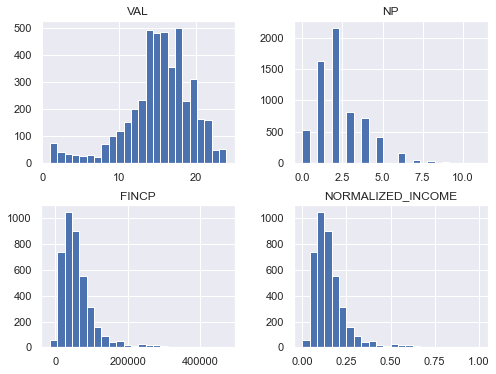

In [95]:
df.hist(bins=24)

### Q1: How many properties are worth $1,000,000 or more?

Check whether there are any empty values int he VAL column

In [74]:
df["VAL"].isnull().any()

True

There are infact empty values; however, when using the countplot, the empty values will not be used as the X axis anyway. Thus, it is safe to continue without modifying the data.

In [75]:

# Count the number of rows that match the condition
properties_worth_over_million_count = df.loc[df["VAL"] == 24, "VAL"].size
properties_worth_under_million_count = df.loc[ df["VAL"] < 24, "VAL"].size

printf(f"There are %d properties that are worth more than $1000000.", properties_worth_over_million_count)

There are 53 properties that are worth more than $1000000.


<AxesSubplot:title={'center':'Count of properties in each price range'}, xlabel='Property worth group number', ylabel='count'>

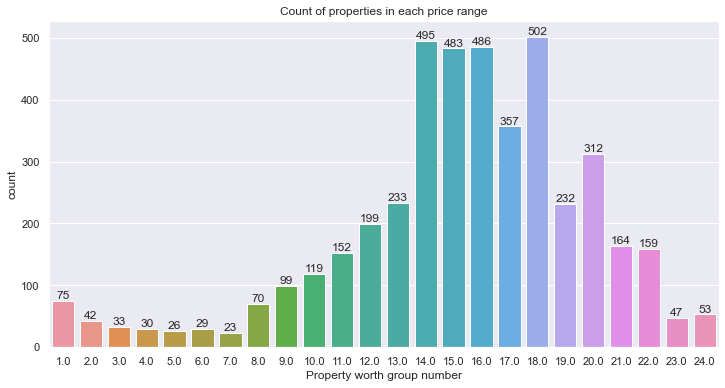

In [76]:
# Plot the count
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.countplot(x="VAL", data=df)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Property worth group number")
ax.set_title("Count of properties in each price range")
ax

In [77]:
df['VAL'].value_counts().sort_index()

1.0      75
2.0      42
3.0      33
4.0      30
5.0      26
6.0      29
7.0      23
8.0      70
9.0      99
10.0    119
11.0    152
12.0    199
13.0    233
14.0    495
15.0    483
16.0    486
17.0    357
18.0    502
19.0    232
20.0    312
21.0    164
22.0    159
23.0     47
24.0     53
Name: VAL, dtype: int64

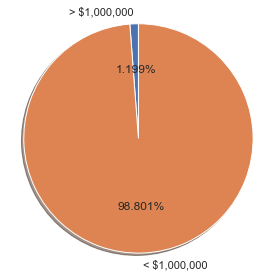

In [78]:
# Pie chart
sns.set(rc={'figure.figsize':(4,4)})

sizes = [properties_worth_over_million_count, properties_worth_under_million_count]
labels = ["> $1,000,000", "< $1,000,000"]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0.5)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

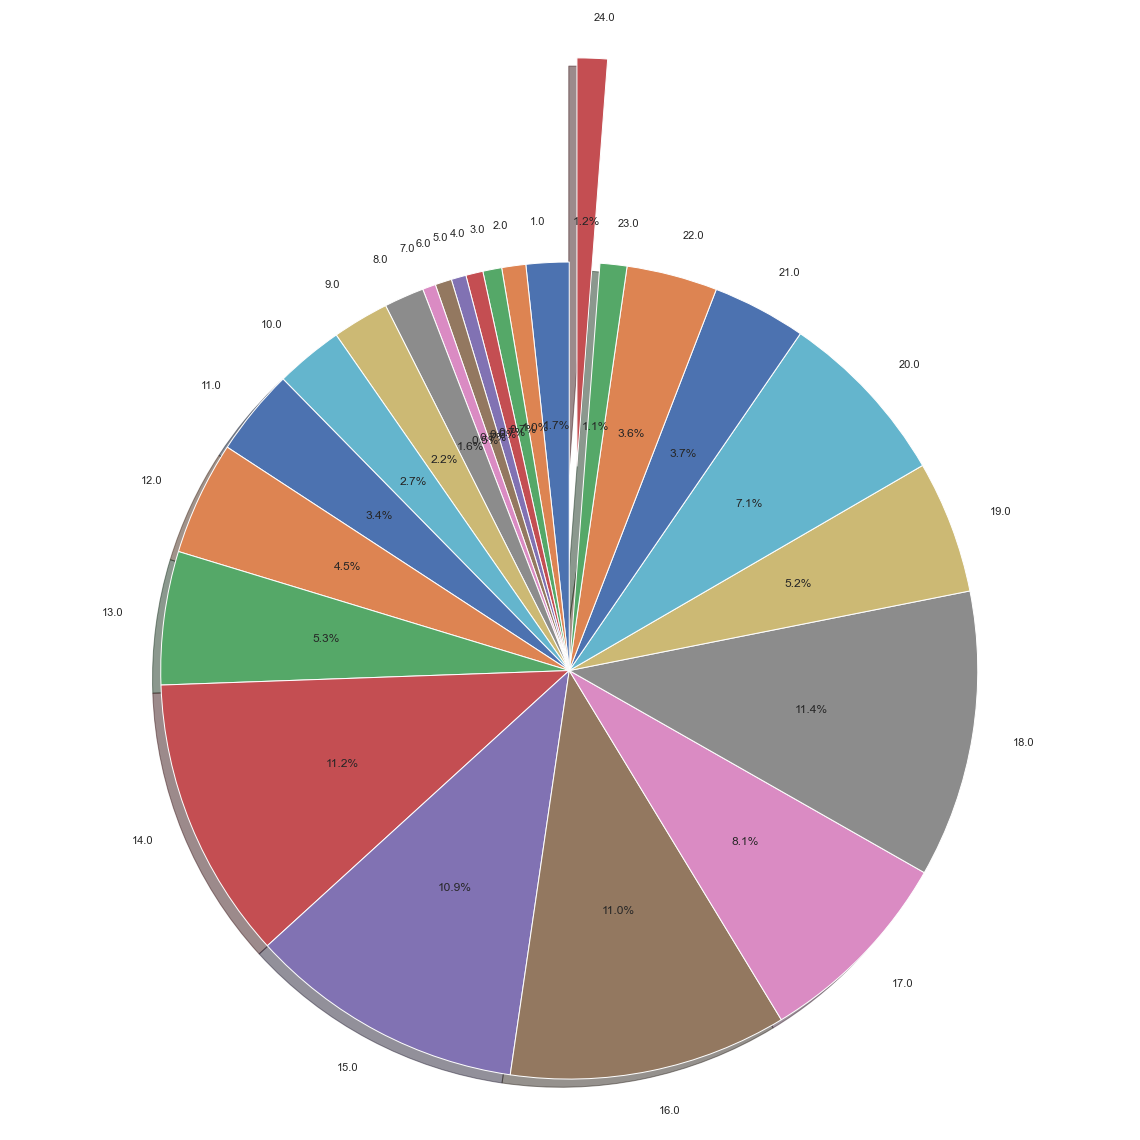

In [79]:
sns.set(rc={'figure.figsize':(16,16)})

sizes = df['VAL'].value_counts().sort_index().values
labels = df['VAL'].value_counts().sort_index().index.tolist()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#### Ajarn's solution

In [99]:
# VAL = Property value 24 for 1M+
print("Number of properties worth 1M + =", len(df[df['VAL']==24]))
print("Percent of missing values", np.round (df ['VAL'].isna().sum()*100/len (df), 2), "%")

Number of properties worth 1M + = 53
Percent of missing values 31.96 %


In [100]:
df['VAL'].value_counts()

18.0    502
14.0    495
16.0    486
15.0    483
17.0    357
20.0    312
13.0    233
19.0    232
12.0    199
21.0    164
22.0    159
11.0    152
10.0    119
9.0      99
1.0      75
8.0      70
24.0     53
23.0     47
2.0      42
3.0      33
4.0      30
6.0      29
5.0      26
7.0      23
Name: VAL, dtype: int64

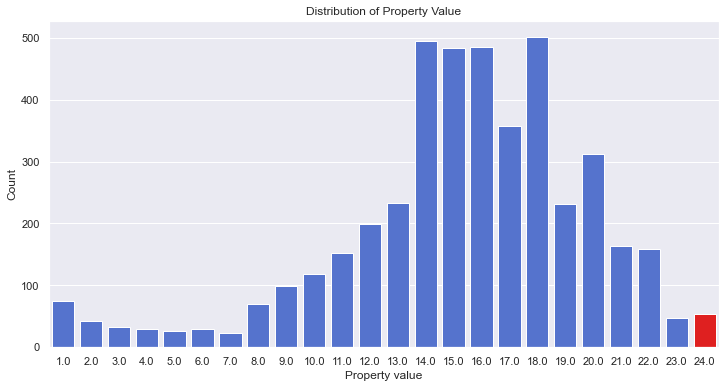

In [102]:
bar_color= ['royalblue' for i in range (23)]
bar_color.append('red')
plt. figure(figsize= (12,6));
sns. countplot (x=df ['VAL'],palette=bar_color )
plt.xlabel("Property value")
plt.ylabel("Count")
plt.title("Distribution of Property Value");

### Q2: How many people recorded in a house on average?

Check if the NP column contains any NULL values because the calculated average number of recorded persons in the house would be inaccurate if the NULL values are included.

In [80]:
df["NP"].isnull().any()

False

Since there are no null values, the NP data can be used directly

Ajarn recommends countplot for discrete values and histograms for continuous values

<AxesSubplot:title={'center':'Count of properties in each price range'}, xlabel='Property worth group number', ylabel='count'>

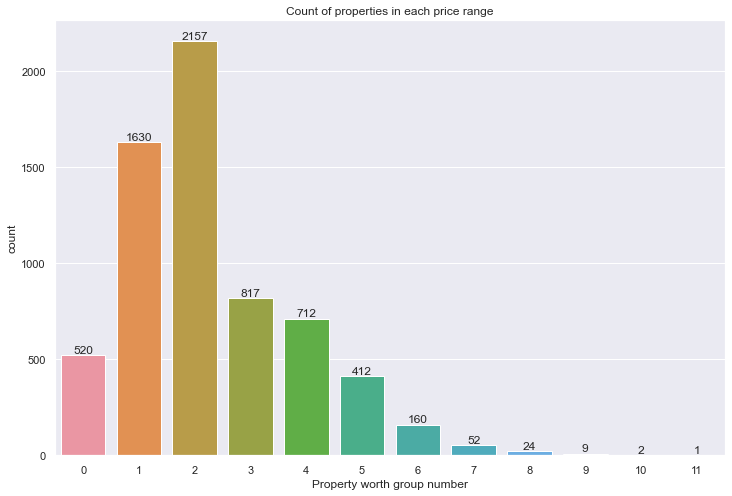

In [81]:
# Plot the count
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x="NP", data=df)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Property worth group number")
ax.set_title("Count of properties in each price range")
ax

In [82]:
number_of_person_recorded_list = df["NP"]
avg_number_of_person_recorded = np.average(number_of_person_recorded_list)
print(avg_number_of_person_recorded)

2.2984913793103448


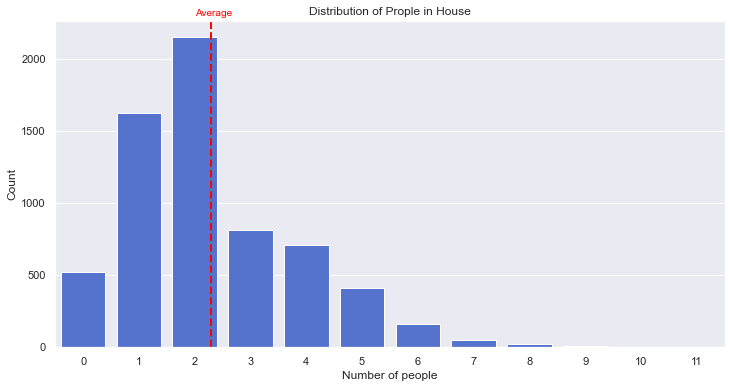

In [104]:
plt. figure(figsize= (12,6));
sns.countplot(x=df['NP'],palette=bar_color)
plt.axvline(x=df['NP'].mean() , color='red' , ls='--', lw=2)
plt.xlabel("Number of people")
plt.ylabel("Count")
plt.title("Distribution of Prople in House");
plt. text (2, 2300,
"Average", fontsize=10, c='red');

#### Ajarn's answer

### Q3 Draw a graph to show the relationship between the property value and the number of persons recorded

In reality, you have to check the relationship between 2 variables between some variables. Something like linear regression. Put the X that is strongly linearly related to your y. In the graph, it should be close to a linear line. If not, you should drop this x.

In linear regression, x1 shouldn't have linear relationship with other x like x2.

In [83]:
df_on_sale = df.copy().dropna(axis=0, subset=['VAL'])

In [84]:
# Group the rows by the values of two columns
grouped_df = df_on_sale.groupby(["VAL", "NP"])

# Get the count of each group
group_counts = grouped_df.size().reset_index(name = "Counts")

df_on_sale['VAL_NP_COUNT'] = np.nan
for i in range(0, 6495):
  df_on_sale['VAL_NP_COUNT'][i] = group_counts[(group_counts['VAL'] == df['VAL'][i]) & (group_counts['NP'] == df['NP'][i])]['Counts']
df_on_sale

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_22541/1736480714.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on_sale['VAL_NP_COUNT'][i] = group_counts[(group_counts['VAL'] == df['VAL'][i]) & (group_counts['NP'] == df['NP'][i])]['Counts']
/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_22541/1736480714.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on_sale['VAL_NP_COUNT'][i] = group_counts[(group_counts['VAL'] == df['VAL'][i]) & (group_counts['NP'] == df['NP'][i])]['Counts']
/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_22541/1736480714.py:9: SettingWithCopyWarning: 

,VAL,NP,FINCP,VAL_NP_COUNT
0,17.0,4,105600.0,47.0
2,18.0,2,9400.0,225.0
3,19.0,4,66000.0,43.0
4,20.0,4,93000.0,45.0
5,15.0,4,61000.0,75.0
...,...,...,...,...
6484,6.0,2,17900.0,11.0
6488,15.0,3,64000.0,86.0
6489,16.0,2,400.0,194.0
6492,16.0,2,53200.0,194.0


The most simple plot for finding relatinoship is the scatterplot

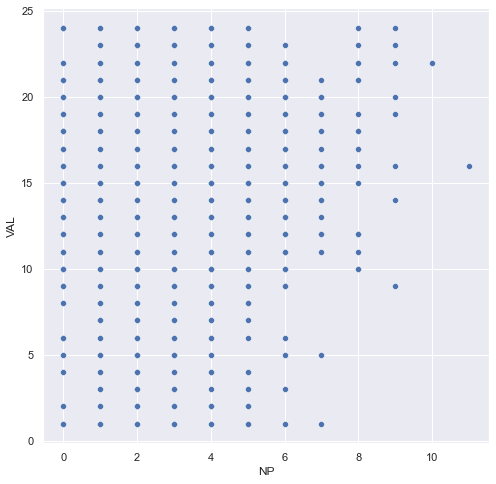

In [85]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.scatterplot(data=df_on_sale, x="NP", y="VAL", legend="auto")

Students ask ajarn if they should draw other model because the scatterplot looks like this.

We can conclude that NP and VAL has no strong linear relationship.

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_22541/2307667218.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(sm).set_label("NP & VAL pair occurence count")


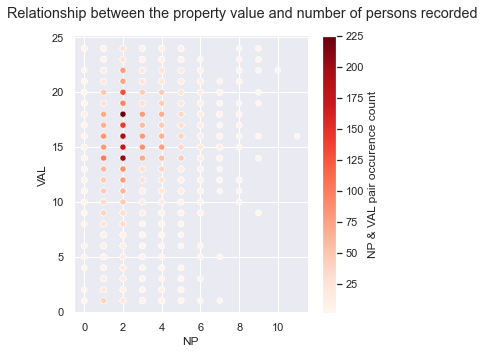

In [86]:
# setup the colorbar
norm = plt.Normalize(df_on_sale['VAL_NP_COUNT'].min(), df_on_sale['VAL_NP_COUNT'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)

# Plot the relationship between the property value and number of persons recorded
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.relplot(data=df_on_sale, x="NP", y="VAL", hue="VAL_NP_COUNT", palette="Reds", legend="auto")
ax.fig.suptitle("Relationship between the property value and number of persons recorded")
ax.fig.subplots_adjust(top=0.9);
ax._legend.remove()
ax.figure.colorbar(sm).set_label("NP & VAL pair occurence count")
plt.show(ax)

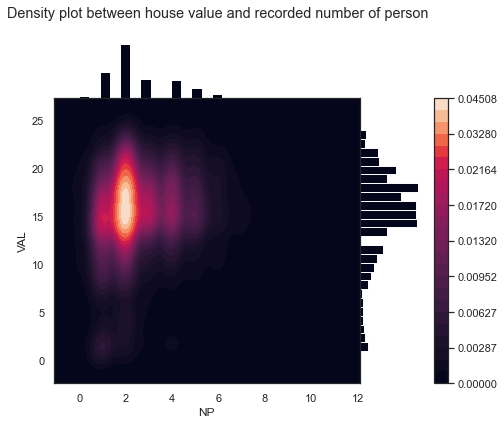

In [87]:
sns.set_theme(style="white")
ax = sns.JointGrid(data=df_on_sale, x="NP", y="VAL", space=0)
ax.plot_joint(sns.kdeplot,
             fill=True, 
             thresh=0, levels=25, cmap="rocket", cbar=True)
ax.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25,)

# Set plot position
ax.fig.suptitle("Density plot between house value and recorded number of person")
plt.subplots_adjust(top=0.9)
pos_joint_ax = ax.ax_joint.get_position()
pos_marg_x_ax = ax.ax_marg_x.get_position()
ax.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
ax.fig.axes[-1].set_position([1, pos_joint_ax.y0, 1, pos_joint_ax.height])
plt.show()

In [88]:
df["VAL"].corr(df["NP"])

0.13061541451180145

**How should you explain this?**
- the VAL and NP of person has some relationship, but they do not have a linear relationship
- This is what you have to say when you draw the KDE plot

### Q4: Normalize family income into a range (0-1). Compare before vs after in histogram

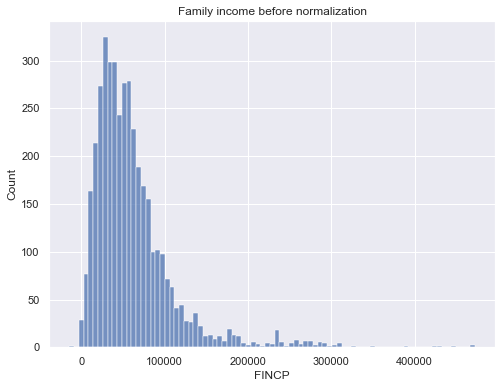

In [119]:
# Plot the histogram of income before normalization
sns.set(rc={'figure.figsize':(8, 6)})

ax = sns.histplot(df['FINCP'])
# ax.bar_label(ax.containers[0])
ax.set_title("Family income before normalization")
plt.show(ax)

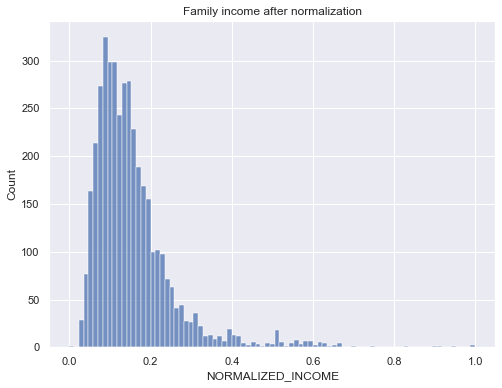

In [120]:
# Compute the minimum and maximum values
min_val = df["FINCP"].min()
max_val = df["FINCP"].max()
range_val = max_val - min_val

# Normalize the income column
df["NORMALIZED_INCOME"] = (df["FINCP"] - min_val) / range_val

# Plot the histogram of income after normalization
sns.set(rc={'figure.figsize':(8, 6)})
ax = sns.histplot(df['NORMALIZED_INCOME'])
# ax.bar_label(ax.containers[0])
ax.set_title("Family income after normalization")
plt.show(ax)

#### Ajarn's

In [121]:
#Normalize
scaler = sklearn.processing.MinMaxScaler(feature_range= (0, 1)) # something thing wrong
scaler.fit(df['FINCP'].values. reshape (-1,1))
df ['n2']=scaler.transform(df ['FINCP'].values. reshape(-1,1))
#normalized = scaler.fit_transform(df ['FINCP'].values. reshape (-1,1))

AttributeError: module 'sklearn' has no attribute 'processing'

KeyError: 'n1'

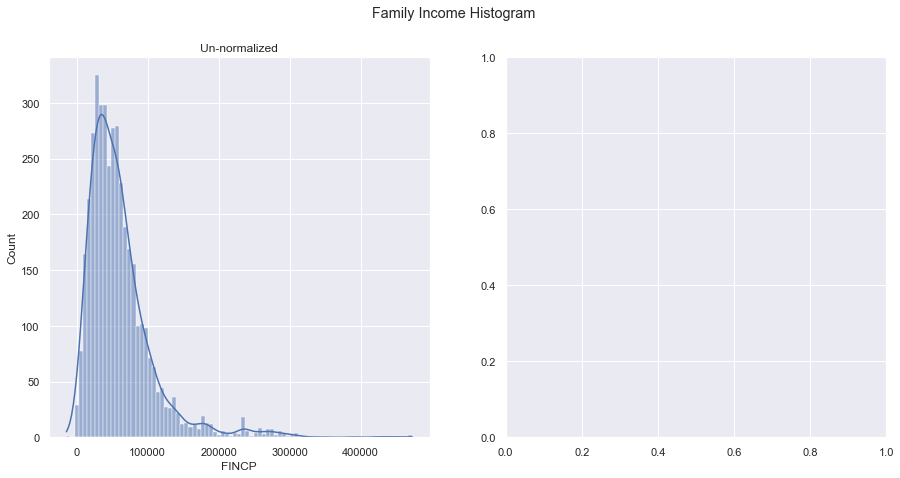

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
f.suptitle("Family Income Histogram")
sns.histplot (df ['FINCP'], ax=axes [0], kde=True) ;
axes [0].set_title("Un-normalized" )
sns.histplot (df ['n1'],ax=axes [1], kde=True, legend=False);
axes [1].set_title("Normalized");

another solution

### Q5: Use 5 bins for both cases

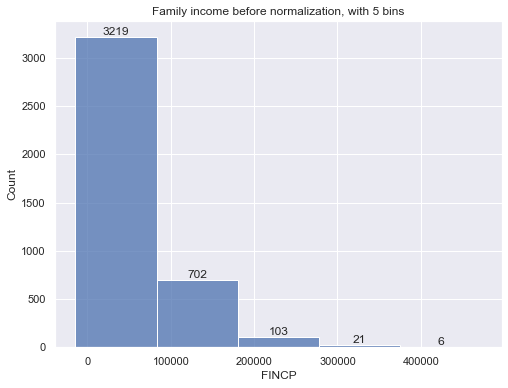

In [ ]:
# Plot the histogram of income before normalization
ax = sns.histplot(df['FINCP'], bins=5)
ax.set_title("Family income before normalization, with 5 bins")
ax.bar_label(ax.containers[0])
plt.show(ax)

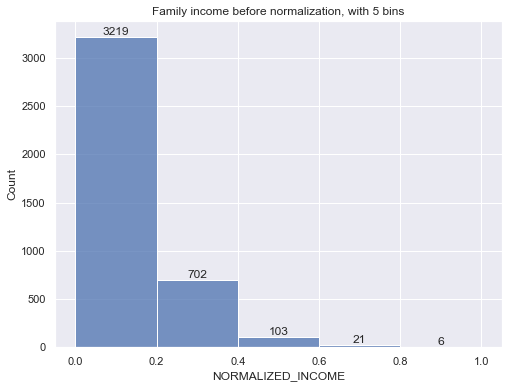

In [ ]:
# Compute the minimum and maximum values
min_val = df["FINCP"].min()
max_val = df["FINCP"].max()
range_val = max_val - min_val

# Normalize the income column
df["NORMALIZED_INCOME"] = (df["FINCP"] - min_val) / range_val

# Plot the histogram of income after normalization
ax = sns.histplot(df['NORMALIZED_INCOME'], bins=5)
ax.bar_label(ax.containers[0])
ax.set_title("Family income before normalization, with 5 bins")


plt.show(ax)